# **Laboratory 3** : visualization with igraph

## References

https://networkx.org/

https://igraph.org/python/doc/igraph

https://igraph.org/python/doc/tutorial/tutorial.html

https://pyvis.readthedocs.io/en/latest/

## Setup

In [27]:
!pip install python-igraph

In [28]:
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Importing the data and creating a networkx graph

In [29]:
# Step 1: Import CSV files into pandas DataFrames
edges_df = pd.read_csv("edges.csv", delimiter=",", dtype={"weight": int})
nodes_df = pd.read_csv("nodes.csv", delimiter=",")

# Step 2: Create a NetworkX graph from the data
G_nx = nx.Graph()

# Add nodes with attributes
for _, row in nodes_df.iterrows():
    G_nx.add_node(row["word"], frequency=row["frequency"] , community=row["community"])

# Add edges with weights
for _, row in edges_df.iterrows():
    G_nx.add_edge(row["source_word"], row["target_word"], weight=row["weight"], source_community=row["source_community"], target_community=row["target_community"])

## Converting to igraph and calculating network properties

In [30]:
# Step 3: Convert NetworkX graph to iGraph
G_ig = ig.Graph.from_networkx(G_nx)
# Step 4: Calculate metrics in iGraph
G_ig.vs["degree"] = G_ig.degree()
G_ig.vs["pagerank"] = G_ig.pagerank()
G_ig.vs["modularity_class"] = G_ig.community_multilevel(weights="weight").membership

In [31]:
# Loop through each node (vertex) in the graph
for vertex in G_ig.vs:
    print(f"Node: {vertex['_nx_name']}")
    print(f"Degree: {vertex['degree']}")
    print(f"Community: {vertex['community']}")
    print(f"PageRank: {vertex['pagerank']}")
    print(f"Modularity Class: {vertex['modularity_class']}")
    print("-" * 50)


Node: hate
Degree: 43
Community: 6
PageRank: 0.001336990536225643
Modularity Class: 0
--------------------------------------------------
Node: government
Degree: 56
Community: 5
PageRank: 0.0016377528066508081
Modularity Class: 1
--------------------------------------------------
Node: electric
Degree: 33
Community: 2
PageRank: 0.0010650440776538918
Modularity Class: 2
--------------------------------------------------
Node: car
Degree: 120
Community: 2
PageRank: 0.003262454684444223
Modularity Class: 2
--------------------------------------------------
Node: never
Degree: 121
Community: 0
PageRank: 0.0032831937819936432
Modularity Class: 3
--------------------------------------------------
Node: climate
Degree: 219
Community: 3
PageRank: 0.005817814876746236
Modularity Class: 4
--------------------------------------------------
Node: believe
Degree: 77
Community: 7
PageRank: 0.002150146241647361
Modularity Class: 5
--------------------------------------------------
Node: cycle
Degree:

In [33]:
# Loop through each edge in the graph
for edge in G_ig.es:
    source = edge.source  # Source node of the edge
    target = edge.target  # Target node of the edge
    weight = edge['weight']  # Weight attribute of the edge
    #source_community = edge.source_community  # Source node of the edge
    #target_community = edge.target_community  # Target node of the edge
    print(f"Edge: {G_ig.vs[source]['_nx_name']} -> {G_ig.vs[target]['_nx_name']}")
    #print(f"Edge: {G_ig.vs[source_community]['_nx_name']} -> {G_ig.vs[target_community]['_nx_name']}")
    print(f"Weight: {weight}")
    print("-" * 50)

Output streaming troncato alle ultime 5000 righe.
Weight: 4
--------------------------------------------------
Edge: generation -> today
Weight: 4
--------------------------------------------------
Edge: generation -> home
Weight: 1
--------------------------------------------------
Edge: hot -> winter
Weight: 1
--------------------------------------------------
Edge: hot -> extremely
Weight: 2
--------------------------------------------------
Edge: hot -> fall
Weight: 2
--------------------------------------------------
Edge: hot -> weather
Weight: 3
--------------------------------------------------
Edge: hot -> Spain
Weight: 2
--------------------------------------------------
Edge: hot -> architecture
Weight: 2
--------------------------------------------------
Edge: hot -> research
Weight: 1
--------------------------------------------------
Edge: hot -> western
Weight: 1
--------------------------------------------------
Edge: hot -> UK
Weight: 4
--------------------------------

## Visualizing the graph

In [10]:
!pip install cairocffi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00


In [12]:
import cairocffi as cairo

In [34]:
ig.plot(G_ig)

### Node size by degree

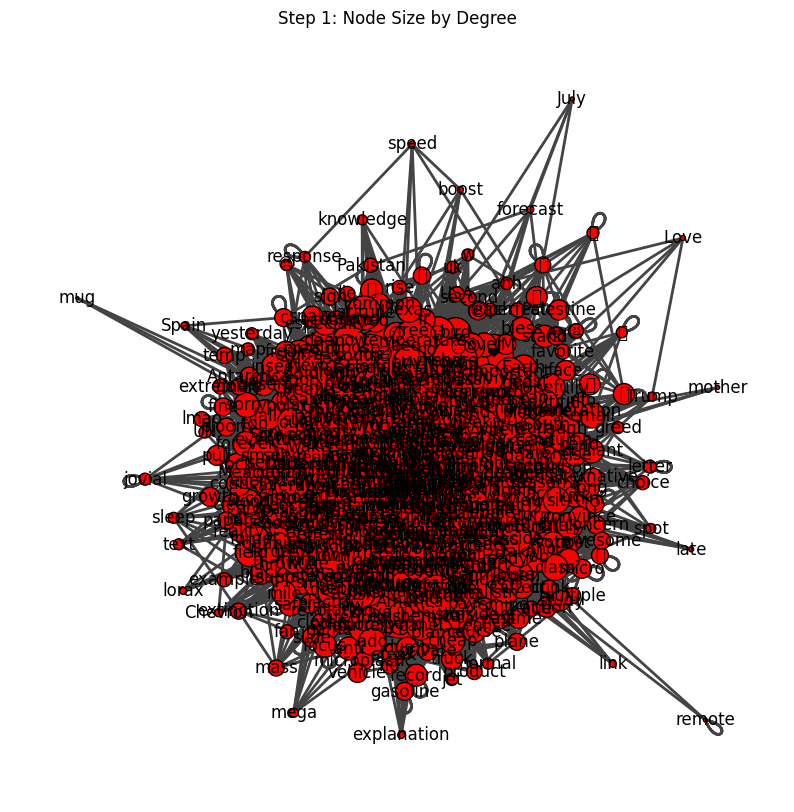

In [36]:
# Plot Step 1 Node size by degree
node_sizes = [1 * deg for deg in G_ig.vs["degree"]]  # Scale node size by degree

fig, ax = plt.subplots(figsize=(10, 10))  # Ensure the figure is set

ig.plot(
    G_ig,
    vertex_size=node_sizes,
    vertex_label = G_ig.vs["_nx_name"],
    target=ax,  # Plot directly into the axes
    margin=50
)

plt.title("Step 1: Node Size by Degree")
plt.show()


### Node color by property (gender)

In [ ]:
# Plot Step 2: Add node color by gender
gender_color_map = {"Female": "purple", "Male": "green"}
node_colors = [gender_color_map[gender] for gender in G_ig.vs["gender"]]

fig, ax = plt.subplots(figsize=(10, 10))  # Ensure the figure is set

# Plot the graph
ig.plot(
    G_ig,
    vertex_size=node_sizes,
    vertex_color=node_colors,
    vertex_label=G_ig.vs["_nx_name"],
    target=ax,
    margin=50
)

plt.title("Step 2: Node Color by Gender")
plt.show()


### Edge thickness by weight

NameError: name 'node_colors' is not defined

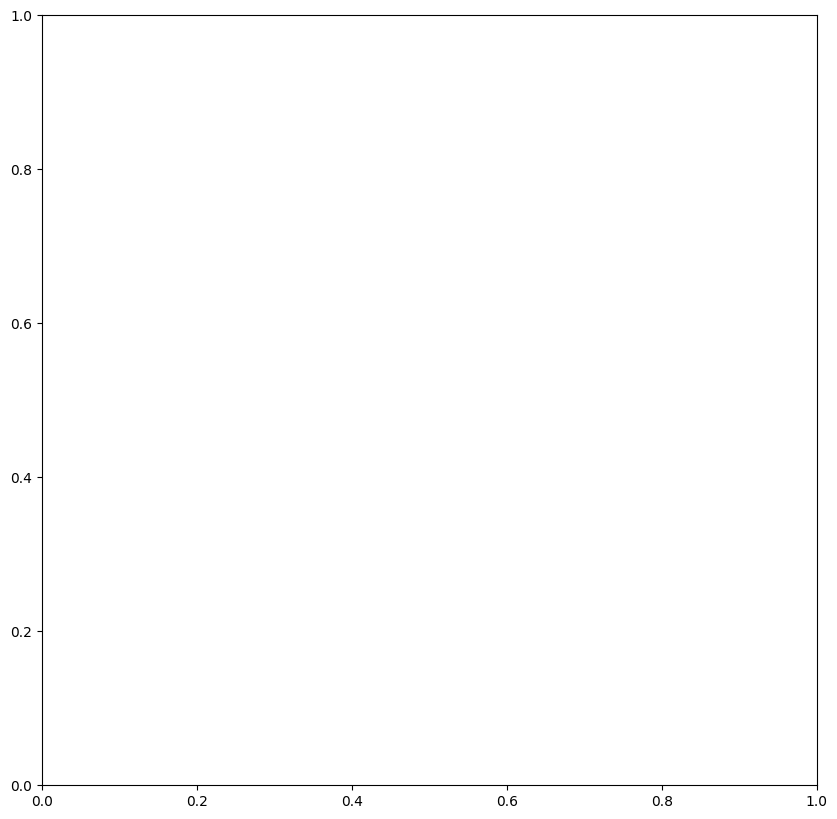

In [8]:
# Plot Step 2: Add node color by gender
edge_weights = [int(weight/3) for weight in G_ig.es["weight"]]

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the graph
ig.plot(
    G_ig,
    vertex_size=node_sizes,
    vertex_color=node_colors,
    vertex_label=G_ig.vs["_nx_name"],
    edge_width=edge_weights,
    target=ax,
    margin=50
)

plt.title("Step 3: Edge Width by Weight")
plt.show()


### Applying a force-based layout algorithm

In [ ]:
# Apply force-based layout (Fruchterman-Reingold)
layout_fr = G_ig.layout_fruchterman_reingold()

# Step 4: Force-Based Layout
fig, ax = plt.subplots(figsize=(10, 10))

ig.plot(
    G_ig,
    vertex_size=node_sizes,
    vertex_color=node_colors,
    vertex_label=G_ig.vs["_nx_name"],
    edge_width=edge_weights,
    layout=layout_fr,
    target=ax,
    margin=50
)

plt.title("Step 4: Force-Based Layout")
plt.show()


### Node size by pagerank, node color by modularity

In [ ]:
# Step 5: Resize nodes by PageRank and recolor by modularity
node_sizes_pagerank = [1000 * pr for pr in G_ig.vs["pagerank"]]
community_colors = list(mcolors.TABLEAU_COLORS.values())
node_colors_community = [
    community_colors[mod % len(community_colors)] for mod in G_ig.vs["modularity_class"]
]

fig, ax = plt.subplots(figsize=(10, 10))

ig.plot(
    G_ig,
    vertex_size=node_sizes_pagerank,
    vertex_color=node_colors_community,
    vertex_label=G_ig.vs["_nx_name"],
    edge_width=edge_weights,
    layout=layout_fr,
    target=ax,
    margin=50
)

plt.title("Step 5: Node Size by PageRank, Color by Community")
plt.show()

## Interactive visualization

In [9]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.1 MB/s eta 0:00:00


In [10]:
# Convert iGraph to NetworkX
G_nx = nx.Graph()

# Convert the nodes
for v in G_ig.vs:
    node_attrs = {key: v[key] for key in v.attributes()}  # Extract node attributes
    G_nx.add_node(v['_nx_name'], **node_attrs)  # Add node with attributes

# Convert the edges
for e in G_ig.es:
    G_nx.add_edge(G_ig.vs[e.source]['_nx_name'], G_ig.vs[e.target]['_nx_name'], weight=e['weight'])

# Check the resulting NetworkX graph
print("Nodes in NetworkX graph:", G_nx.nodes(data=True))
print("Edges in NetworkX graph:", G_nx.edges(data=True))

Nodes in NetworkX graph: [(0, {'_nx_name': 0, 'degree': 37, 'pagerank': 0.0014089550957097005, 'modularity_class': 0}), (1, {'_nx_name': 1, 'degree': 50, 'pagerank': 0.001773004774597034, 'modularity_class': 1}), (2, {'_nx_name': 2, 'degree': 28, 'pagerank': 0.0010850221385947047, 'modularity_class': 1}), (3, {'_nx_name': 3, 'degree': 108, 'pagerank': 0.0036269023995483063, 'modularity_class': 1}), (4, {'_nx_name': 4, 'degree': 101, 'pagerank': 0.0033321280696444956, 'modularity_class': 0}), (5, {'_nx_name': 5, 'degree': 64, 'pagerank': 0.00221694518362018, 'modularity_class': 2}), (6, {'_nx_name': 6, 'degree': 42, 'pagerank': 0.0015364628215212733, 'modularity_class': 3}), (7, {'_nx_name': 7, 'degree': 39, 'pagerank': 0.0014918740086011099, 'modularity_class': 4}), (8, {'_nx_name': 8, 'degree': 102, 'pagerank': 0.0033421196740498044, 'modularity_class': 3}), (9, {'_nx_name': 9, 'degree': 168, 'pagerank': 0.0054683541183854515, 'modularity_class': 1}), (10, {'_nx_name': 10, 'degree': 1

In [11]:
from pyvis.network import Network
from IPython.display import display, HTML


# Create a pyvis network object
net = Network(notebook=True, cdn_resources='in_line')

# Add NetworkX graph to pyvis
net.from_nx(G_nx)

# Show the network in an HTML file
net.show("network.html")


network.html


In [12]:
display(HTML('network.html'))


In [13]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming G is your NetworkX graph

G = G_nx
# Create a PyVis network object
net = Network(notebook=True, cdn_resources='in_line')

# Define colors based on modularity classes
modularity_classes = list(set(nx.get_node_attributes(G, 'modularity_class').values()))
mod_colors = plt.cm.viridis(np.linspace(0, 1, len(modularity_classes)))

# Map modularity class to a color
modularity_color_map = {mod_class: mod_colors[i] for i, mod_class in enumerate(modularity_classes)}

# Add nodes to PyVis network
for node in G.nodes:
    mod_class = G.nodes[node]['modularity_class']
    pagerank = G.nodes[node].get('pagerank', 0)  # Default to 0 if no pagerank attribute
    size = 20 + 500 * pagerank  # Scaling size based on PageRank
    color = modularity_color_map.get(mod_class, 'gray')  # Default to gray if no modularity class
    label = G.nodes[node].get('_nx_name', node)  # Default to node name if no _nx_name attribute

    # Ensure color is in RGB format or hex string
    if isinstance(color, np.ndarray):  # If color is an ndarray, convert to hex
        color = '#{:02x}{:02x}{:02x}'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255))

    # Add node to PyVis network with size and color
    net.add_node(node, label=label, size=int(size), color=color)

# Add edges to PyVis network
for u, v in G.edges:
    net.add_edge(u, v)

# Show the network
net.show("network_graph.html")


network_graph.html


In [14]:
display(HTML('network_graph.html'))
